### 📊 Overview of Plots

This notebook includes several visualizations to explore and summarize meteorological data across Bhutanese regions:

- **Rolling Time Series Plots**  
  30-day rolling averages of **rainfall**, **Tmax**, **Tmin**, and **RH** to visualize temporal trends over the full time range.

- **Seasonal Pattern Plots**  
  Daily averages across years for **rainfall**, **temperature**, and **RH**, highlighting recurring seasonal patterns by region.


In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the processed data
output_dir = '../processed_data'

# Load all region data from processed .pkl files
region_files = [f for f in os.listdir(output_dir) if f.endswith('.pkl')]

region_data = {}
for file in region_files:
    region_name = file.replace('.pkl', '')
    df = pd.read_pickle(os.path.join(output_dir, file))
    region_data[region_name] = df

#### 📄 Example Data from One Region

The table below shows sample meteorological data for a single region, including daily records of rainfall, maximum and minimum temperature, and date information. This structure is consistent across all regions.

In [4]:
df

,Year,Month,Day,Rainfall,Tmax,Tmin,Date
0,2012,5,1,NaN,NaN,NaN,2012-05-01
1,2012,5,2,NaN,NaN,NaN,2012-05-02
2,2012,5,3,NaN,NaN,NaN,2012-05-03
3,2012,5,4,NaN,NaN,NaN,2012-05-04
4,2012,5,5,NaN,NaN,NaN,2012-05-05
...,...,...,...,...,...,...,...
4774,2025,5,27,1.0,29.0,21.0,2025-05-27
4775,2025,5,28,3.6,29.0,21.0,2025-05-28
4776,2025,5,29,23.8,24.5,21.0,2025-05-29
4777,2025,5,30,6.8,20.0,17.0,2025-05-30


### Rolling Time Series Plots

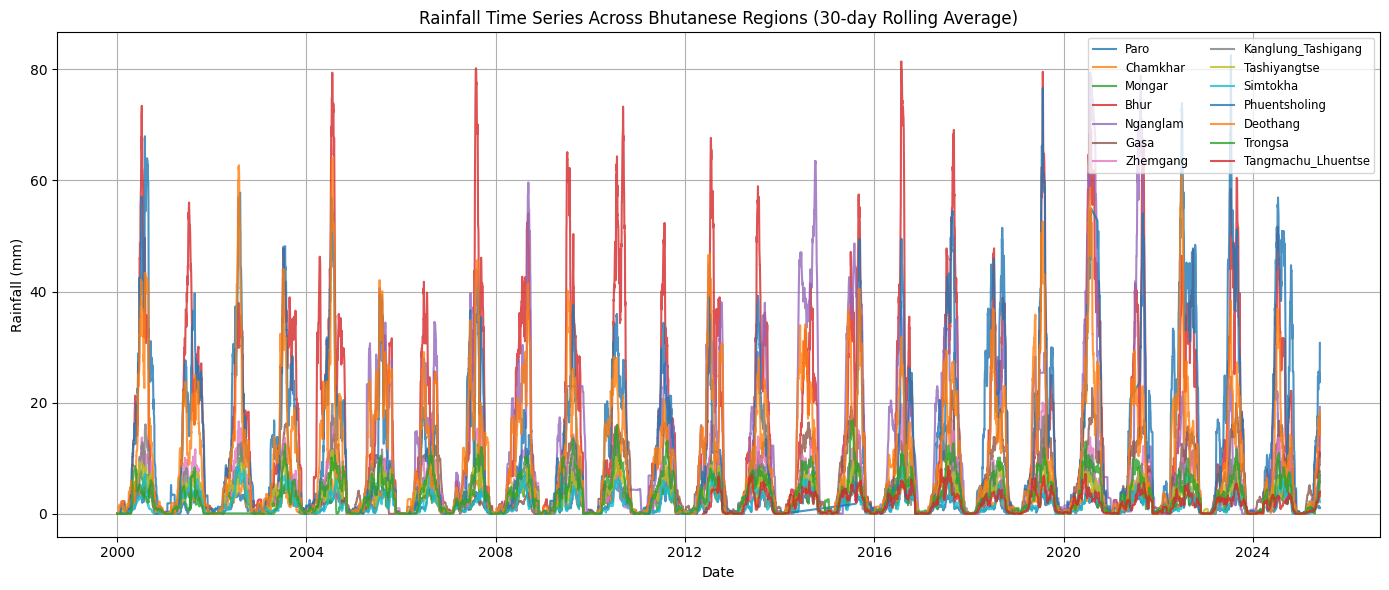

In [3]:
# Plot rainfall for all regions
plt.figure(figsize=(14, 6))

for region, df in region_data.items():
    if 'Date' in df.columns and 'Rainfall' in df.columns:
        df = df.sort_values('Date')
        df = df.dropna(subset=['Date', 'Rainfall'])

        # Smooth with rolling average (e.g. 30 days)
        rainfall_smooth = df['Rainfall'].rolling(window=30, min_periods=1).mean()

        plt.plot(df['Date'], rainfall_smooth, label=region, alpha=0.8)

# Finalize plot
plt.title("Rainfall Time Series Across Bhutanese Regions (30-day Rolling Average)")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

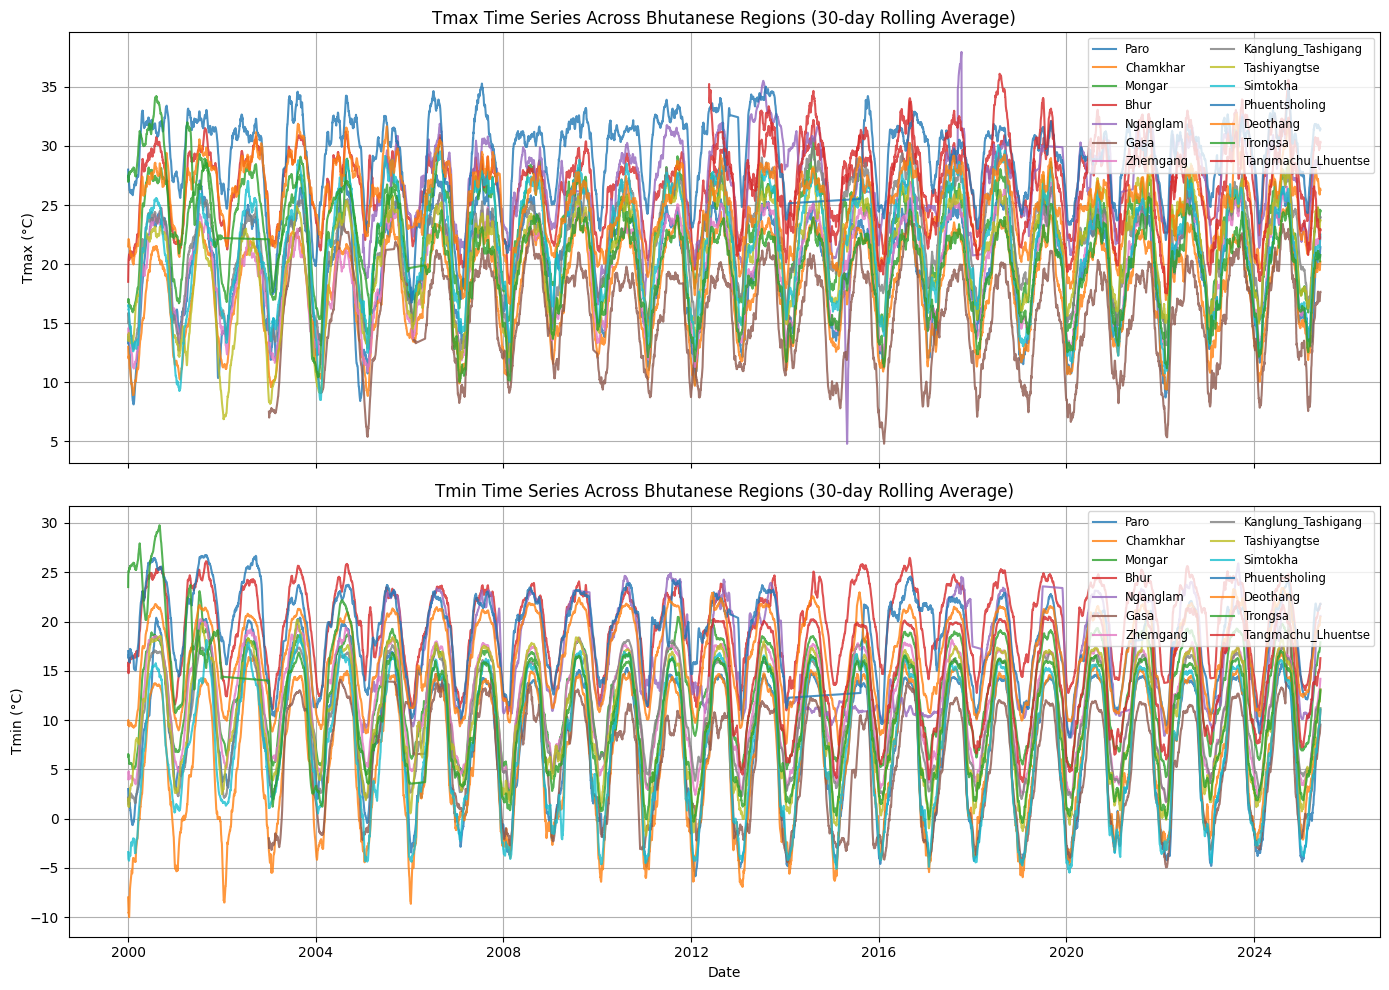

In [4]:
# Create subplots: one for Tmax, one for Tmin
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

for region, df in region_data.items():
    if 'Date' in df.columns and 'Tmax' in df.columns and 'Tmin' in df.columns:
        df = df.sort_values('Date')
        df = df.dropna(subset=['Date', 'Tmax', 'Tmin'])

        tmax_smooth = df['Tmax'].rolling(window=30, min_periods=1).mean()
        tmin_smooth = df['Tmin'].rolling(window=30, min_periods=1).mean()

        axes[0].plot(df['Date'], tmax_smooth, label=region, alpha=0.8)
        axes[1].plot(df['Date'], tmin_smooth, label=region, alpha=0.8)

# Finalize Tmax panel
axes[0].set_title("Tmax Time Series Across Bhutanese Regions (30-day Rolling Average)")
axes[0].set_ylabel("Tmax (°C)")
axes[0].legend(loc='upper right', fontsize='small', ncol=2)
axes[0].grid(True)

# Finalize Tmin panel
axes[1].set_title("Tmin Time Series Across Bhutanese Regions (30-day Rolling Average)")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Tmin (°C)")
axes[1].legend(loc='upper right', fontsize='small', ncol=2)
axes[1].grid(True)

plt.tight_layout()
plt.show()


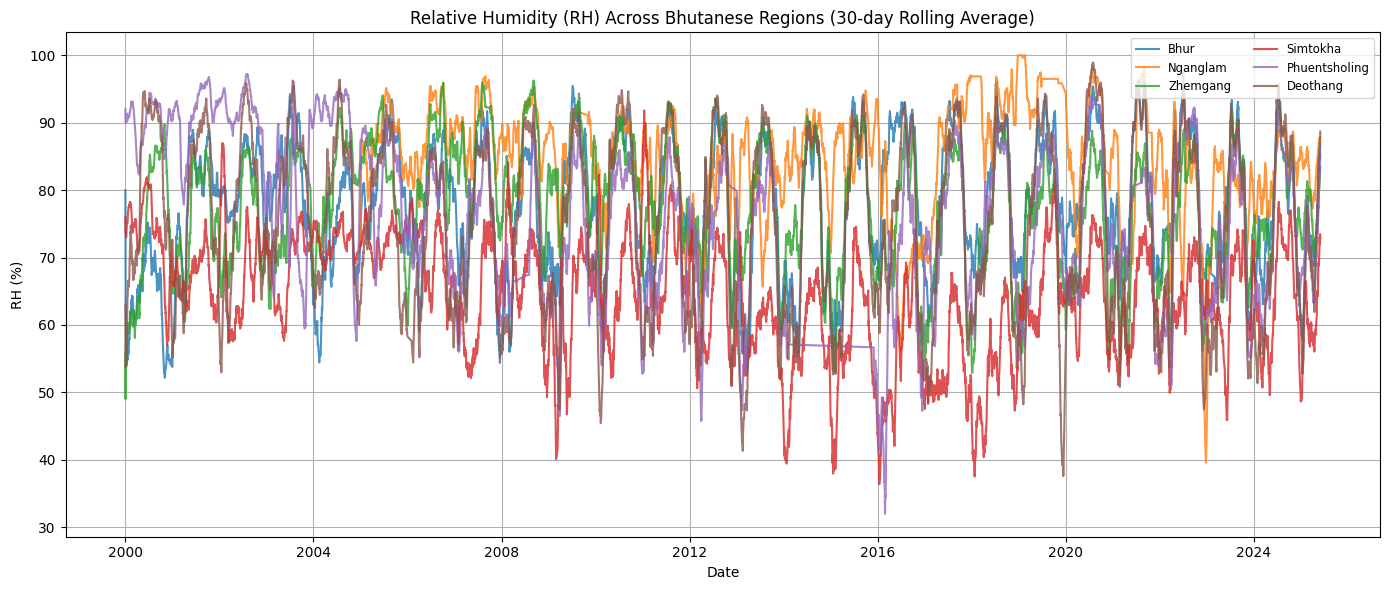

In [5]:
# Create RH plot
plt.figure(figsize=(14, 6))

for region, df in region_data.items():
    if 'Date' in df.columns and 'RH' in df.columns:
        df = df.sort_values('Date')
        df = df.dropna(subset=['Date', 'RH'])

        # Smooth RH using rolling average
        rh_smooth = df['RH'].rolling(window=30, min_periods=1).mean()

        plt.plot(df['Date'], rh_smooth, label=region, alpha=0.8)

# Finalize plot
plt.title("Relative Humidity (RH) Across Bhutanese Regions (30-day Rolling Average)")
plt.xlabel("Date")
plt.ylabel("RH (%)")
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

### Seasonal Pattern Plots

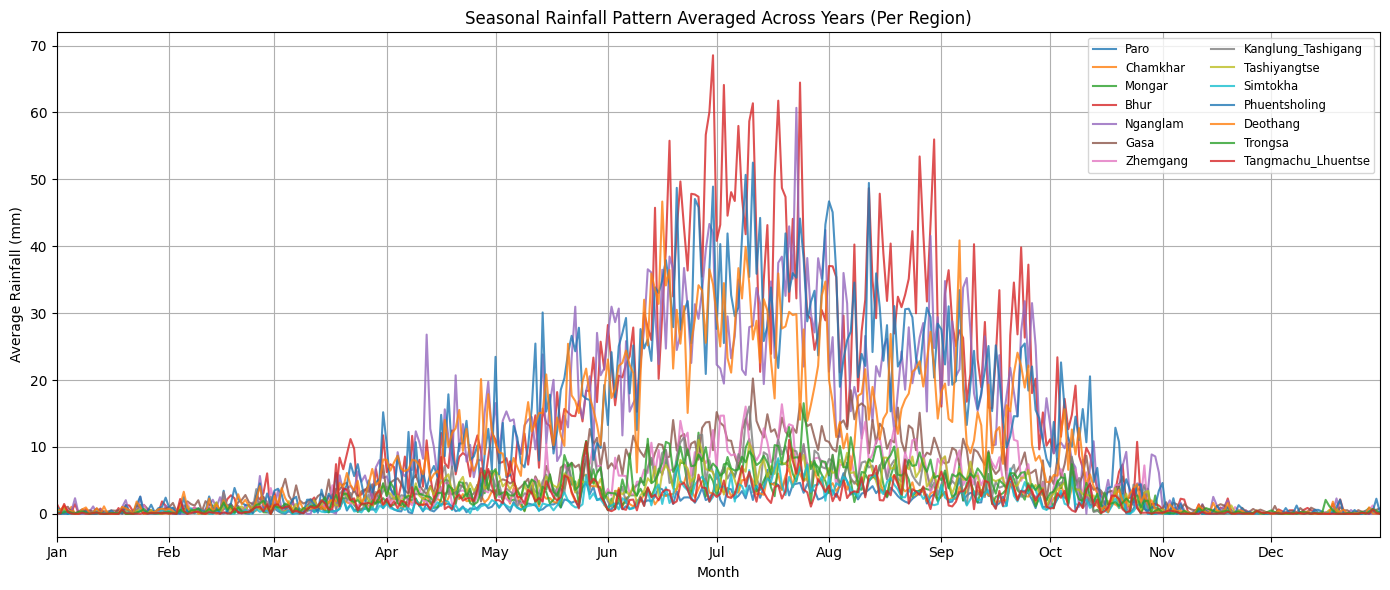

In [12]:
import matplotlib.dates as mdates

plt.figure(figsize=(14, 6))

for region, df in region_data.items():
    if all(col in df.columns for col in ['Month', 'Day', 'Rainfall']):
        df_clean = df.dropna(subset=['Rainfall', 'Month', 'Day'])

        # Group by Month and Day, average across years
        daily_avg = df_clean.groupby(['Month', 'Day'])['Rainfall'].mean().reset_index()

        # Create seasonal date (dummy year for alignment)
        daily_avg['SeasonalDate'] = pd.to_datetime({
            'year': 2000,
            'month': daily_avg['Month'],
            'day': daily_avg['Day']
        })

        daily_avg = daily_avg.sort_values('SeasonalDate')
        plt.plot(daily_avg['SeasonalDate'], daily_avg['Rainfall'], label=region, alpha=0.8)

# Improve x-axis formatting
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Show Jan, Feb, etc.
plt.xlim(pd.to_datetime('2000-01-01'), pd.to_datetime('2000-12-31'))

# Finalize plot
plt.title("Seasonal Rainfall Pattern Averaged Across Years (Per Region)")
plt.xlabel("Month")
plt.ylabel("Average Rainfall (mm)")
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()


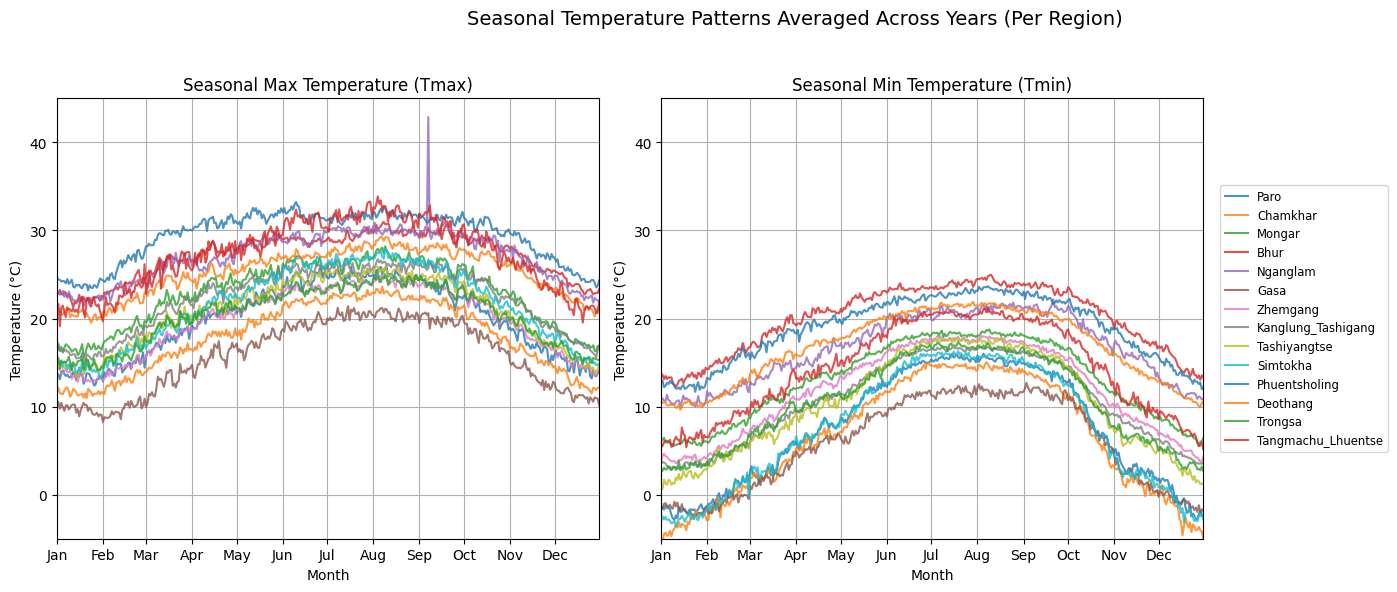

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

y_min, y_max = -5, 45  # Common y-axis range for both plots

for region, df in region_data.items():
    if all(col in df.columns for col in ['Month', 'Day', 'Tmax', 'Tmin']):
        df_clean = df.dropna(subset=['Tmax', 'Tmin', 'Month', 'Day'])

        daily_avg = df_clean.groupby(['Month', 'Day'])[['Tmax', 'Tmin']].mean().reset_index()
        daily_avg['SeasonalDate'] = pd.to_datetime({
            'year': 2000,
            'month': daily_avg['Month'],
            'day': daily_avg['Day']
        })
        daily_avg = daily_avg.sort_values('SeasonalDate')

        ax1.plot(daily_avg['SeasonalDate'], daily_avg['Tmax'], label=region, alpha=0.8)
        ax2.plot(daily_avg['SeasonalDate'], daily_avg['Tmin'], label=region, alpha=0.8)

# Format x-axis
for ax in [ax1, ax2]:
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.set_xlim(pd.to_datetime('2000-01-01'), pd.to_datetime('2000-12-31'))
    ax.set_ylim(y_min, y_max)
    ax.grid(True)

# Titles and labels
ax1.set_title("Seasonal Max Temperature (Tmax)")
ax2.set_title("Seasonal Min Temperature (Tmin)")
ax1.set_xlabel("Month")
ax2.set_xlabel("Month")
ax1.set_ylabel("Temperature (°C)")
ax2.set_ylabel("Temperature (°C)")

# Legend outside right panel
ax2.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize='small')

plt.suptitle("Seasonal Temperature Patterns Averaged Across Years (Per Region)", fontsize=14)
plt.tight_layout(rect=[0, 0, 0.88, 0.95])
plt.show()


In [11]:
# Assuming 'Nganglam' is the culprit
df = region_data['Nganglam']
df[['Date', 'Tmax']].sort_values('Tmax', ascending=False).head(10)


,Date,Tmax
4632,2017-09-07,229.0
2770,2012-08-02,40.5
2745,2012-07-08,40.0
2776,2012-08-08,40.0
2777,2012-08-09,40.0
4656,2017-10-01,40.0
4596,2017-08-02,40.0
4677,2017-10-22,39.0
2796,2012-08-28,39.0
2779,2012-08-11,39.0


In [14]:
# Define an upper threshold for Tmax
tmax_threshold = 45  # Celsius

# Clean Tmax outliers across all regions
for region, df in region_data.items():
    if 'Tmax' in df.columns:
        num_outliers = (df['Tmax'] > tmax_threshold).sum()
        if num_outliers > 0:
            print(f"Cleaning {num_outliers} Tmax outlier(s) in {region}")
            df.loc[df['Tmax'] > tmax_threshold, 'Tmax'] = np.nan


Cleaning 1 Tmax outlier(s) in Nganglam


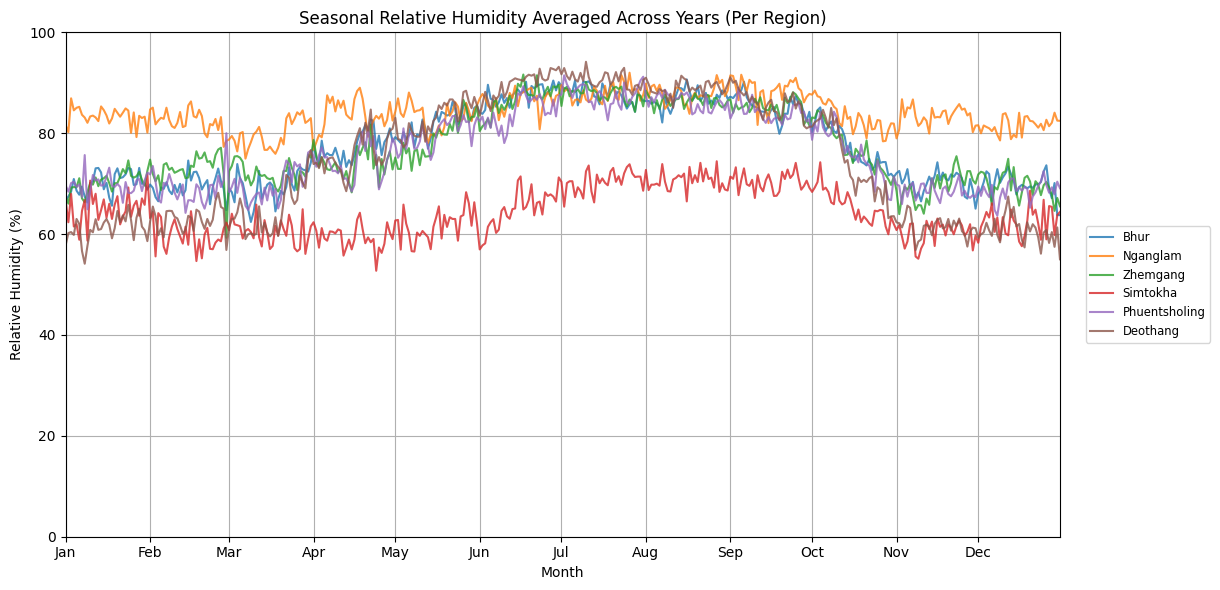

In [17]:
fig, ax = plt.subplots(figsize=(14, 6))

for region, df in region_data.items():
    if all(col in df.columns for col in ['Month', 'Day', 'RH']):
        df_clean = df.dropna(subset=['RH', 'Month', 'Day'])

        # Average across years by day
        daily_avg = df_clean.groupby(['Month', 'Day'])['RH'].mean().reset_index()
        daily_avg['SeasonalDate'] = pd.to_datetime({
            'year': 2000,
            'month': daily_avg['Month'],
            'day': daily_avg['Day']
        })
        daily_avg = daily_avg.sort_values('SeasonalDate')

        ax.plot(daily_avg['SeasonalDate'], daily_avg['RH'], label=region, alpha=0.8)

# Format x-axis as month names
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_xlim(pd.to_datetime('2000-01-01'), pd.to_datetime('2000-12-31'))

# Labels and layout
ax.set_title("Seasonal Relative Humidity Averaged Across Years (Per Region)")
ax.set_xlabel("Month")
ax.set_ylabel("Relative Humidity (%)")
ax.set_ylim(0, 100)
ax.grid(True)
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize='small')

plt.tight_layout(rect=[0, 0, 0.88, 1])
plt.show()


### Annual Average Trends

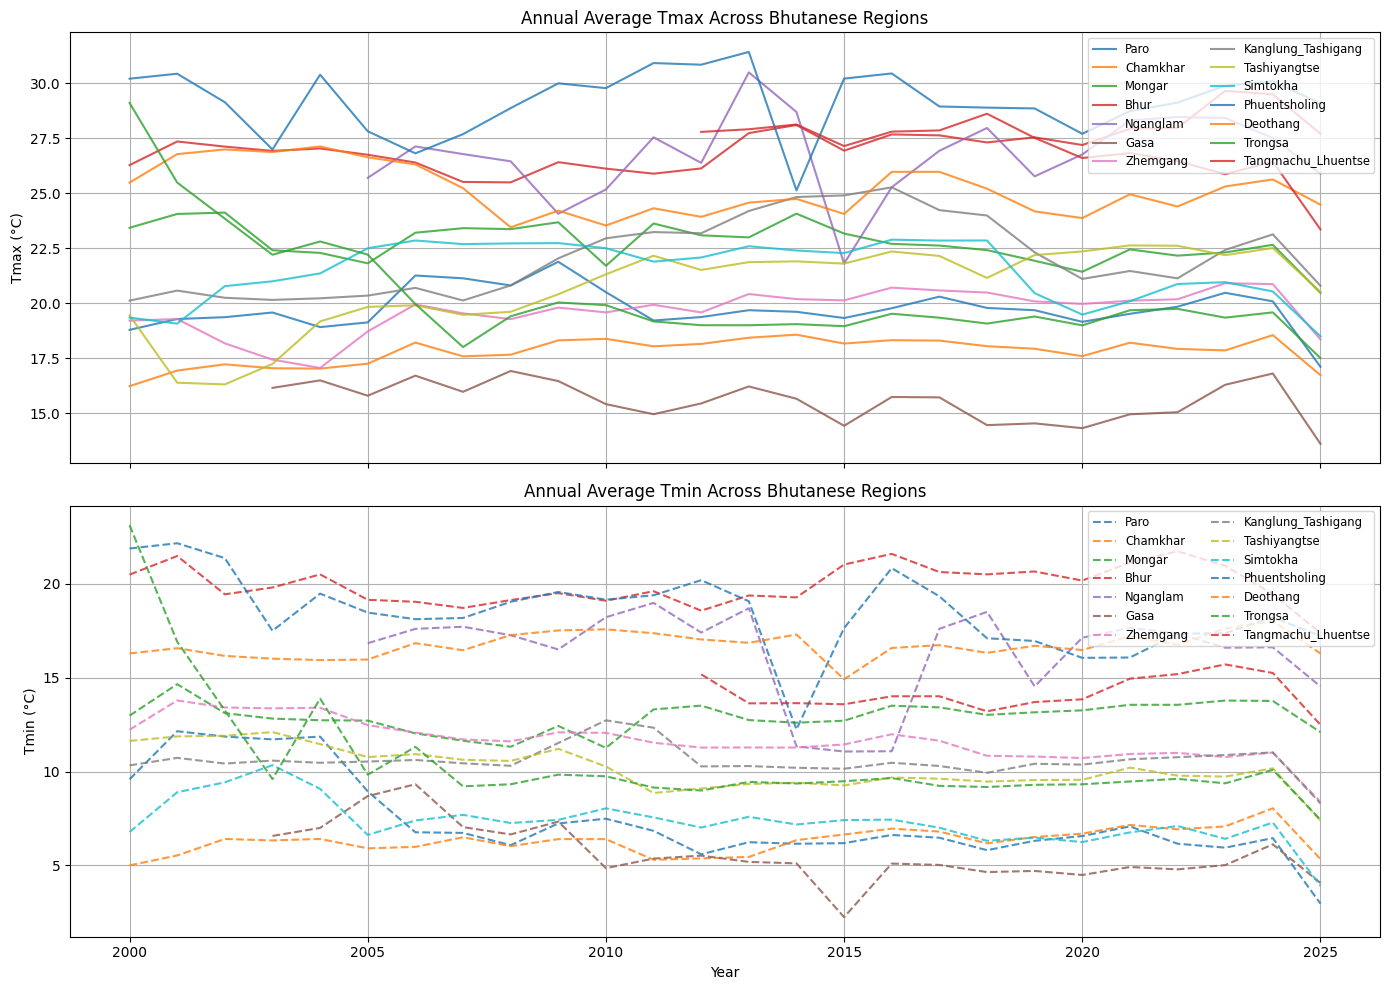

In [8]:
# Create two subplots: one for Tmax annual avg, one for Tmin annual avg
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

for region, df in region_data.items():
    if 'Date' in df.columns and 'Tmax' in df.columns and 'Tmin' in df.columns:
        df = df.sort_values('Date')
        df = df.dropna(subset=['Date', 'Tmax', 'Tmin'])

        # Extract year
        df['Year'] = df['Date'].dt.year

        # Compute annual averages
        annual_avg = df.groupby('Year')[['Tmax', 'Tmin']].mean()

        # Plot annual average Tmax
        axes[0].plot(annual_avg.index, annual_avg['Tmax'], label=region, linestyle='-', alpha=0.8)

        # Plot annual average Tmin
        axes[1].plot(annual_avg.index, annual_avg['Tmin'], label=region, linestyle='--', alpha=0.8)

# Format Tmax subplot
axes[0].set_title("Annual Average Tmax Across Bhutanese Regions")
axes[0].set_ylabel("Tmax (°C)")
axes[0].legend(loc='upper right', fontsize='small', ncol=2)
axes[0].grid(True)

# Format Tmin subplot
axes[1].set_title("Annual Average Tmin Across Bhutanese Regions")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Tmin (°C)")
axes[1].legend(loc='upper right', fontsize='small', ncol=2)
axes[1].grid(True)

plt.tight_layout()
plt.show()


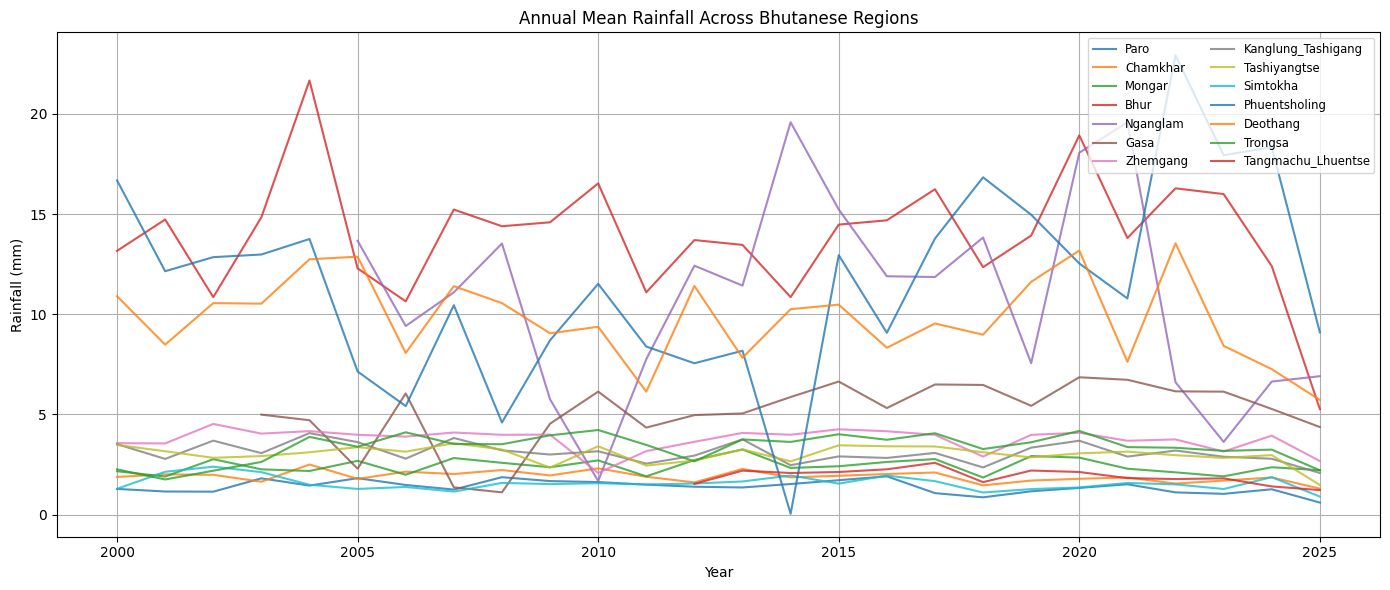

In [9]:
# Annual average rainfall plot for all regions
plt.figure(figsize=(14, 6))

for region, df in region_data.items():
    if 'Date' in df.columns and 'Rainfall' in df.columns:
        df = df.sort_values('Date')
        df = df.dropna(subset=['Date', 'Rainfall'])

        # Extract year
        df['Year'] = df['Date'].dt.year

        # Compute annual mean rainfall (NaNs are skipped by default)
        annual_avg = df.groupby('Year')['Rainfall'].mean()

        # Plot
        plt.plot(annual_avg.index, annual_avg.values, label=region, alpha=0.8)

# Finalize plot
plt.title("Annual Mean Rainfall Across Bhutanese Regions")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()


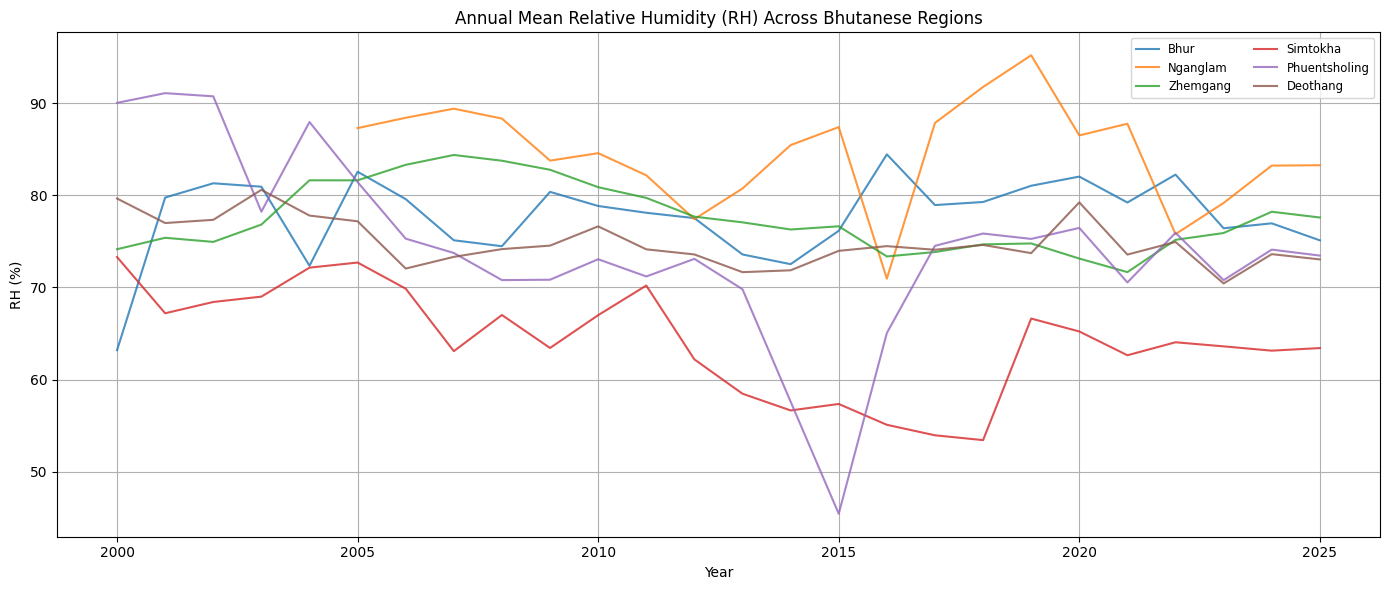

In [10]:
# Annual average RH plot for all regions
plt.figure(figsize=(14, 6))

for region, df in region_data.items():
    if 'Date' in df.columns and 'RH' in df.columns:
        df = df.sort_values('Date')
        df = df.dropna(subset=['Date', 'RH'])

        # Extract year
        df['Year'] = df['Date'].dt.year

        # Compute annual mean RH (NaNs skipped by default)
        annual_avg = df.groupby('Year')['RH'].mean()

        # Plot
        plt.plot(annual_avg.index, annual_avg.values, label=region, alpha=0.8)

# Finalize plot
plt.title("Annual Mean Relative Humidity (RH) Across Bhutanese Regions")
plt.xlabel("Year")
plt.ylabel("RH (%)")
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()
